# install

## I 

In [4]:
# Install (versions compatibles + évite le package `keras` standalone)
%pip install -U pip setuptools wheel
%pip install -U tabulate scikit-learn pandas numpy matplotlib seaborn gensim "tensorflow==2.16.1"

# Test TensorFlow (ne fait pas planter le notebook si l'environnement Windows manque de DLL)
try:
	import tensorflow as tf
	print("TensorFlow:", tf.__version__)
	print(tf.reduce_sum(tf.random.normal([1000, 1000])))
except Exception as e:
	print("TensorFlow n'a pas pu se charger (runtime natif / DLL).")
	print("Erreur:", repr(e))
	print("\nPistes courantes (Windows):")
	print(" - Installer/mettre à jour 'Microsoft Visual C++ Redistributable 2015-2022 (x64)'")
	print(" - Éviter Python du Microsoft Store: utiliser python.org/conda + nouveau venv")
	print(" - CPU trop ancien (AVX requis): utiliser un autre environnement (WSL/conda) ou une build no-AVX")

Note: you may need to restart the kernel to use updated packages.
  Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl.metadata (60 kB)
Note: you may need to restart the kernel to use updated packages.
TensorFlow: 2.16.1
tf.Tensor(936.428, shape=(), dtype=float32)


## Si echec - diagnostic

In [1]:
# Diagnostic TensorFlow (sortie courte, utile sous Windows)
import sys, platform, site, pathlib, traceback

print("Python:", sys.version.replace("\n", " "))
print("Executable:", sys.executable)
print("Platform:", platform.platform())
print("Machine:", platform.machine())

site_paths = []
try:
    site_paths = site.getsitepackages()
except Exception:
    site_paths = [site.getusersitepackages()]
print("Site-packages:")
for p in site_paths:
    print(" -", p)

# Cherche des traces d'une install cassée (ex: dossier '~ensorflow' -> warning pip)
for p in site_paths:
    base = pathlib.Path(p)
    if base.exists():
        bad = sorted([x.name for x in base.glob("~ensorflow*")])
        if bad:
            print("\nTraces suspectes dans", str(base))
            for name in bad:
                print(" -", name)

print("\nTest import tensorflow...")
try:
    # Évite un vieux module resté en mémoire après uninstall/reinstall
    for k in list(sys.modules.keys()):
        if k == "tensorflow" or k.startswith("tensorflow.") or k.startswith("keras") or k.startswith("tensorboard"):
            sys.modules.pop(k, None)

    import tensorflow as tf
    print("tensorflow module:", tf)
    print(" - __file__:", getattr(tf, "__file__", None))
    spec = getattr(tf, "__spec__", None)
    if spec is not None:
        print(" - spec.origin:", spec.origin)
        print(" - spec.submodule_search_locations:", list(spec.submodule_search_locations or []))
    print("OK TensorFlow:", tf.__version__)
except Exception as e:
    print("ECHEC import TensorFlow:", repr(e))
    print("\nTraceback (résumé):")
    print(traceback.format_exc())

Python: 3.10.9 (tags/v3.10.9:1dd9be6, Dec  6 2022, 20:01:21) [MSC v.1934 64 bit (AMD64)]
Executable: c:\Users\FX506\AppData\Local\Programs\Python\Python310\python.exe
Platform: Windows-10-10.0.19045-SP0
Machine: AMD64
Site-packages:
 - c:\Users\FX506\AppData\Local\Programs\Python\Python310
 - c:\Users\FX506\AppData\Local\Programs\Python\Python310\lib\site-packages

Test import tensorflow...
tensorflow module: <module 'tensorflow' from 'c:\\Users\\FX506\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\tensorflow\\__init__.py'>
 - __file__: c:\Users\FX506\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\__init__.py
 - spec.origin: c:\Users\FX506\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\__init__.py
 - spec.submodule_search_locations: ['c:\\Users\\FX506\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\tensorflow', 'c:\\Users\\FX506\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\tensorflow\\

## Si echec - cleanup

In [ ]:
# Cleanup TensorFlow/Keras (corrige les résidus type `~ensorflow` + réinitialise l'install)
# À exécuter si l'import TF est cassé / warnings pip `Ignoring invalid distribution ~ensorflow`
import sys, site, pathlib, shutil

print("Python executable:", sys.executable)
if "WindowsApps" in sys.executable:
    print("⚠️ Python Microsoft Store détecté : c'est une source fréquente de soucis avec TF. ")
    print("   Recommandé: Python depuis python.org/Miniconda + venv, puis re-sélectionner le kernel.")

# 1) Désinstall propre via pip (dans le kernel courant)
%pip uninstall -y tensorflow tensorflow-intel tensorflow-cpu keras keras-nightly tensorboard tensorboard-data-server tensorflow-estimator

# 2) Suppression des résidus dans le site-packages UTILISATEUR (pas dans WindowsApps)
user_sp = pathlib.Path(site.getusersitepackages())
print("User site-packages:", user_sp)

patterns = [
    "~ensorflow*", "tensorflow", "tensorflow-*dist-info", "tensorflow_*dist-info",
    "~keras*", "keras", "keras-*dist-info",
    "tensorboard", "tensorboard-*dist-info", "tensorboard_data_server*",
    "tensorflow_estimator*", "tensorflow_io_gcs_filesystem*"
 ]

removed = []
if user_sp.exists():
    for pat in patterns:
        for path in user_sp.glob(pat):
            try:
                if path.is_dir():
                    shutil.rmtree(path, ignore_errors=True)
                else:
                    path.unlink(missing_ok=True)
                removed.append(str(path))
            except Exception as e:
                print("Impossible de supprimer", path, "->", repr(e))
else:
    print("User site-packages introuvable (", user_sp, ")")

print("\nSupprimé (résumé):")
if removed:
    for p in removed[:50]:
        print(" -", p)
    if len(removed) > 50:
        print(f" ... +{len(removed)-50} autres")
else:
    print("(rien à supprimer, ou déjà propre)")

print("\nEnsuite:")
print("1) Redémarre le kernel")
print("2) Relance la cellule Install (TensorFlow==2.16.1)")
print("3) Relance la cellule Diagnostic")

# Partie 1: 

In [1]:
# Suppression des avertissements liés à Scikit-learn
import warnings # Masquer les avertissements (ex. : FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
# Librairies générales
import pandas as pd # Librairie pour la manipulation de données
import numpy as np # Librairie pour le calcul numérique
import sys # Fonctions et variables liées à l'interpréteur Python
import copy # Création de copies d'objets
from numpy import mean, std # Fonctions de calcul de moyenne et d'écart type
import zipfile # Traitement de fichiers zip
import os # Manipulation de fichiers et chemins
# Librairie affichage
import matplotlib.pyplot as plt # Outils de visualisation 2D
from matplotlib import pyplot # Interface de la bibliothèque Matplotlib
import seaborn as sns # Bibliothèque de visualisation de données basée sur Matplotlib
# Scikit-learn pour l'évaluation des modèles
from sklearn.metrics import confusion_matrix # Matrice de confusion
from sklearn.model_selection import KFold # Outils de validation croisée
from sklearn.metrics import accuracy_score # Calcul de l'accuracy
from sklearn.model_selection import train_test_split # Découpage train/test
# TensorFlow et Keras
import tensorflow as tf # Librairie de deep learning
import keras # API haut niveau pour construire et entraîner des modèles de deeplearning
from keras import layers # Modules de couches pour construire des modèles Keras
from keras import models # Outils pour créer des modèles Keras
from keras import optimizers # Outils d'optimisation
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Générateurd'images pour l'augmentation des données
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping # Rappels pour le suivi et l'arrêt précoce
from keras.layers import Input, Dense, Dropout, Flatten, Lambda # Types de couches Keras
from keras.layers import Conv2D, MaxPooling2D # Couches convolutionnelles et de pooling
from keras.preprocessing import image # Outils de prétraitement d'images
from tensorflow.keras.models import Model, load_model # Définition / chargement de modèles
from keras.datasets import fashion_mnist # Jeu de données Fashion MNIST
from tensorflow.keras.utils import to_categorical # Conversion en encodage one-hot
from tensorflow.keras.optimizers import SGD # Optimiseur Stochastic Gradient Descent
from tensorflow.keras.applications.resnet50 import ResNet50 # Modèle ResNet50␣pré-entraîné
from tensorflow.keras.preprocessing import image # Prétraitement d'images pour les modèles Keras

In [2]:
def plot_curves(histories):
    """
    Fonction pour afficher les courbes de loss et d'accuracy moyennées et écart-types à travers les k-folds.
    Paramètres :
        - histories (list) : Historique d'entraînement des différents plis K-folds.
    """
    # Initialisation des figures
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    # Extraction du nombre d'époques d'après l'un des historiques
    epochs = range(len(histories[0].history['loss']))
    # Calcul des moyennes et des écart-types pour chaque époque
    mean_loss = np.mean([history.history['loss'] for history in histories],axis=0)
    std_loss = np.std([history.history['loss'] for history in histories],axis=0)
    mean_val_loss = np.mean([history.history['val_loss'] for history in histories],axis=0)
    std_val_loss = np.std([history.history['val_loss'] for history in histories],axis=0)
    mean_accuracy = np.mean([history.history['accuracy'] for history in histories],axis=0)
    std_accuracy = np.std([history.history['accuracy'] for history in histories],axis=0)
    mean_val_accuracy = np.mean([history.history['val_accuracy'] for history in histories],axis=0)
    std_val_accuracy = np.std([history.history['val_accuracy'] for history in histories],axis=0)
    # Couleurs pour les courbes
    train_color = 'blue'
    val_color = 'orange'
    # Courbes de loss avec moyenne et écart-type
    ax1.plot(epochs, mean_loss, color=train_color, label='Train')
    ax1.fill_between(epochs, mean_loss - std_loss, mean_loss + std_loss, color=train_color, alpha=0.2)
    ax1.plot(epochs, mean_val_loss, color=val_color, label='Validation')
    ax1.fill_between(epochs, mean_val_loss - std_val_loss, mean_val_loss + std_val_loss, color=val_color, alpha=0.2)
    # Courbes d'accuracy avec moyenne et écart-type
    ax2.plot(epochs, mean_accuracy, color=train_color, label='Train')
    ax2.fill_between(epochs, mean_accuracy - std_accuracy, mean_accuracy + std_accuracy, color=train_color, alpha=0.2)
    ax2.plot(epochs, mean_val_accuracy, color=val_color, label='Validation')
    ax2.fill_between(epochs, mean_val_accuracy - std_val_accuracy, mean_val_accuracy + std_val_accuracy,
    color=val_color, alpha=0.2)
    # Titres, labels et légendes
    ax1.set_title(f'Loss (k={len(histories)})')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax2.set_title(f'Accuracy (k={len(histories)})')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    plt.show()

Imports et fonctions plot_curves définies, maintenant on télécharge les dataSets

In [5]:
# Définition du répertoire cible
model_dir = "./cnn_models/"
# Création du répertoire s'il n'existe pas
os.makedirs(model_dir, exist_ok=True)
zip_file = "cnn_models.zip"
#!wget https://www.lirmm.fr/~poncelet/Ressources/cnn_models.zip
!Powershell.exe -Command ((new-object System.Net.WebClient).DownloadFile('https://www.lirmm.fr/~poncelet/Ressources/cnn_models.zip','cnn_models.zip'))

# Extraction du fichier ZIP
with zipfile.ZipFile(zip_file, "r") as zip_ref: 
    zip_ref.extractall(model_dir)
# Suppression du fichier ZIP après extraction pour économiser de l'espace
os.remove(zip_file)

In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
print("Nombre d'exemples du jeu d'apprentissage : ", X_train.shape[0])
print("Nombre d'exemples du jeu de test : ", X_test.shape[0])
print ("Format du jeu d'apprentissage : ", X_train.shape)
print ("Format du jeu de test : ", X_test.shape)
print ("Format d'une image", X_train[0].shape)

Nombre d'exemples du jeu d'apprentissage :  60000
Nombre d'exemples du jeu de test :  10000
Format du jeu d'apprentissage :  (60000, 28, 28)
Format du jeu de test :  (10000, 28, 28)
Format d'une image (28, 28)


In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

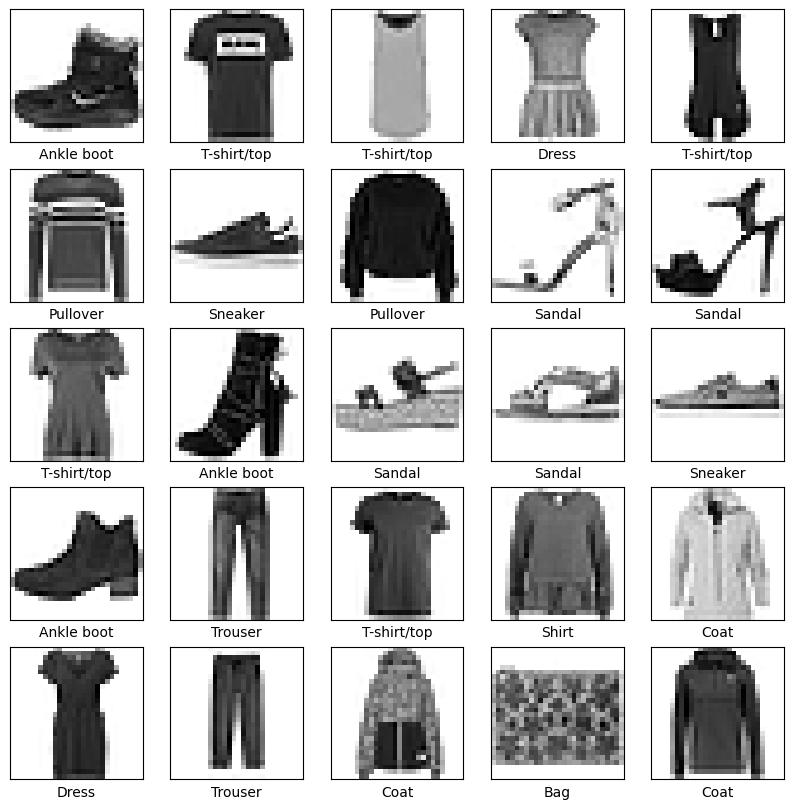

In [10]:
#Visualisation d'images
plt.figure(figsize=(10,10))
columns = 25
for i in range(columns):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

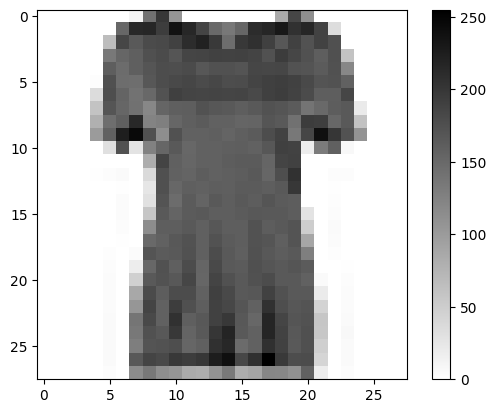

In [11]:
numimage=10
plt.figure()
plt.imshow(X_train[numimage], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
# Sauvegarde des données avant transformation
X_train_original=copy.deepcopy(X_train)
X_test_original=copy.deepcopy(X_test)
train_images = X_train / 255.0
test_images = X_test / 255.0

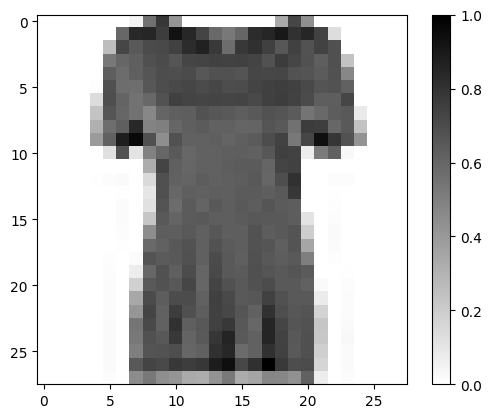

In [13]:
numimage=10
plt.figure()
plt.imshow(train_images[numimage], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
def load_dataset():
    """
    Charge et prépare le jeu de données Fashion MNIST pour l'entraînement
    Étapes :
    - Chargement des ensembles d'entraînement et de test.
    - Reshape pour ajouter un canal (passage de 28x28 à 28x28x1).
    - Encodage des étiquettes en one-hot.
    Retourne :
    - X_train : données d'entraînement reshaped (échantillons, 28, 28, 1).
    - y_train : étiquettes d'entraînement encodées en one-hot.
    - X_test : données de test reshaped (échantillons, 28, 28, 1).
    - y_test : étiquettes de test encodées en one-hot.
    """
    # Chargement des données Fashion MNIST
    (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
    # Redimensionnement des images pour inclure un canal unique (28x28x1)
    X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
    X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
    # Encodage one-hot des étiquettes de classe
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    return X_train, y_train, X_test, y_test
def clean_data(train, test):
    """
    Prétraitement des données : conversion en float, normalisation entre 0 et 1.
    Paramètres :
    - train : tableau de données d'entraînement
    - test : tableau de données de test
    Retourne :
    - train_norm : données d'entraînement normalisées
    - test_norm : données de test normalisées
    """
    # Conversion des entiers en floats pour permettre la normalisation
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # Normalisation des valeurs entre 0 et 1
    train_norm /= 255.0
    test_norm /= 255.0
    return train_norm, test_norm

In [15]:
def define_model(shapeinput=(28, 28, 1)):
    # Couche d'entrée
    inputs = Input(shape=shapeinput, name="Input_Layer")
    # Couche convolutionnelle avec pooling
    x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
    name="Conv2D_1")(inputs)
    x = MaxPooling2D(pool_size=(2, 2), name="MaxPooling2D_1")(x)
    # Flatten pour préparer les données pour la partie dense
    x = Flatten(name="Flatten")(x)
    # Couches denses pour la classification
    x = Dense(100, activation='relu', name="Dense_1")(x)
    outputs = Dense(10, activation='softmax', name="Output")(x)
    model = Model(inputs=inputs, outputs=outputs, name="Baseline_CNN")
    # Compilation du modèle
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy',
    metrics=['accuracy'])
    return model

In [16]:
def evaluate_model(model, dataX, dataY, folds=5, epochs=10):
    """
    Évalue le modèle avec une validation croisée K-fold.
    Paramètres :
    - model : modèle de réseau de neurones Keras à évaluer.
    - dataX : données d'entrée pour l'entraînement et la validation.
    - dataY : étiquettes de sortie correspondantes.
    - folds : nombre de splits pour la validation croisée.
    - epochs : nombre d'époques pour l'entraînement de chaque split.
    Retourne :
    - scores : liste des scores d'accuracy du modèle pour chaque split.
    - histories : liste des historique d'entraînement pour chaque split.
    """
    scores, histories = [], [] # Initialisation des scores et historiques
    kfold = KFold(n_splits=folds, shuffle=True, random_state=1)
    # Itération sur chaque split généré par le K-fold
    for train_ix, test_ix in kfold.split(dataX):
        # Sélection des données d'entraînement et de test pour le fold
        X_train, y_train = dataX[train_ix], dataY[train_ix]
        X_test, y_test = dataX[test_ix], dataY[test_ix]
        # Réinitialisation du modèle avant chaque itération
        model = define_model()
        # Entraînement du modèle
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=32,
        validation_data=(X_test, y_test), verbose=1)
        # Évaluation du modèle sur les données de test actuelles
        loss, acc = model.evaluate(X_test, y_test, verbose=0)
        print(f'Précision : {acc * 100:.3f}%')
        # Stockage de l'historique
        scores.append(acc)
        histories.append(history)
    return scores, histories

In [17]:
def run_evaluation(folds, epochs):
    """
    Fonction d'évaluation

    Cette fonction effectue les étapes suivantes :
    1. Chargement du jeu de données Fashion MNIST.
    2. Prétraitement des données : nettoyage et normalisation.
    3. Initialisation du modèle de base et affichage de sa structure.
    4. Évaluation du modèle avec validation croisée (K-fold).
    5. Affichage des courbes de performance et des statistiques de précision.

    Paramètres :
    - folds (int) : Nombre de splits pour la validation croisée (K-fold).
    - epochs (int) : Nombre d'époques d'entraînement pour chaque pli du K-fold.

    Retourne :
    - None
    """

    # Chargement du jeu de données d'entraînement et de test
    X_train, y_train, X_test, y_test = load_dataset()

    # Prétraitement des données : nettoyage et normalisation
    X_train, X_test = clean_data(X_train, X_test)

    # Initialisation du modèle de base
    model = define_model()
    print(model.summary())

    # Évaluation du modèle
    scores, histories = evaluate_model(model, X_train, y_train, folds, epochs)

    # Affichage des courbes de performance
    plot_curves(histories)

    # Affichage des statistiques de précision : moyenne et écart-type
    print(f'Précision : moyenne={mean(scores) * 100:.3f}% écart-type={std(scores) * 100:.3f}%, k={len(scores)}')

In [20]:
k=5 # Nombre de folds
epochs=10 # Nombre d'epochs
shapeinput=(28, 28, 1) # Format de l'image 28x28 sur 1 canal
run_evaluation(k,epochs)

Model: "Baseline_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2D_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling2D_1 (MaxPooling2D)   │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 100)            │       540,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 542,230 (2.07 MB)

 Trainable params: 542,230 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8165 - loss: 0.5132 - val_accuracy: 0.8560 - val_loss: 0.3868
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8812 - loss: 0.3320 - val_accuracy: 0.8913 - val_loss: 0.3007
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8974 - loss: 0.2824 - val_accuracy: 0.8953 - val_loss: 0.2828
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9087 - loss: 0.2492 - val_accuracy: 0.8976 - val_loss: 0.2812
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9185 - loss: 0.2253 - val_accuracy: 0.8954 - val_loss: 0.2914
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9254 - loss: 0.2020 - val_accuracy: 0.8992 - val_loss: 0.2826
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9314 - loss: 0.1860 - val_accuracy: 0.8910 - val_loss: 0.2954
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9377 - loss: 0.16

KeyboardInterrupt: 

<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"><span style="font-weight: bold">Model: "Baseline_CNN"</span>
</pre>
<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace">┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃<span style="font-weight: bold"> Layer (type)                    </span>┃<span style="font-weight: bold"> Output Shape           </span>┃<span style="font-weight: bold">       Param # </span>┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (<span style="color: #0087ff; text-decoration-color: #0087ff">InputLayer</span>)        │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">28</span>, <span style="color: #00af00; text-decoration-color: #00af00">28</span>, <span style="color: #00af00; text-decoration-color: #00af00">1</span>)      │             <span style="color: #00af00; text-decoration-color: #00af00">0</span> │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2D_1 (<span style="color: #0087ff; text-decoration-color: #0087ff">Conv2D</span>)               │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">26</span>, <span style="color: #00af00; text-decoration-color: #00af00">26</span>, <span style="color: #00af00; text-decoration-color: #00af00">32</span>)     │           <span style="color: #00af00; text-decoration-color: #00af00">320</span> │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling2D_1 (<span style="color: #0087ff; text-decoration-color: #0087ff">MaxPooling2D</span>)   │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">13</span>, <span style="color: #00af00; text-decoration-color: #00af00">13</span>, <span style="color: #00af00; text-decoration-color: #00af00">32</span>)     │             <span style="color: #00af00; text-decoration-color: #00af00">0</span> │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (<span style="color: #0087ff; text-decoration-color: #0087ff">Flatten</span>)               │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">5408</span>)           │             <span style="color: #00af00; text-decoration-color: #00af00">0</span> │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (<span style="color: #0087ff; text-decoration-color: #0087ff">Dense</span>)                 │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">100</span>)            │       <span style="color: #00af00; text-decoration-color: #00af00">540,900</span> │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (<span style="color: #0087ff; text-decoration-color: #0087ff">Dense</span>)                  │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">10</span>)             │         <span style="color: #00af00; text-decoration-color: #00af00">1,010</span> │
└─────────────────────────────────┴────────────────────────┴───────────────┘
</pre>
<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"><span style="font-weight: bold"> Total params: </span><span style="color: #00af00; text-decoration-color: #00af00">542,230</span> (2.07 MB)
</pre>
<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"><span style="font-weight: bold"> Trainable params: </span><span style="color: #00af00; text-decoration-color: #00af00">542,230</span> (2.07 MB)
</pre>
<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"><span style="font-weight: bold"> Non-trainable params: </span><span style="color: #00af00; text-decoration-color: #00af00">0</span> (0.00 B)
</pre>
None
Epoch 1/5
[1m938/938[0m [32m━━━━━━━━━━━━━━━━━━━━[0m[37m[0m [1m6s[0m 6ms/step - accuracy: 0.7876 - loss: 0.5889 - val_accuracy: 0.8432 - val_loss: 0.4313
Epoch 2/5
[1m938/938[0m [32m━━━━━━━━━━━━━━━━━━━━[0m[37m[0m [1m5s[0m 5ms/step - accuracy: 0.8648 - loss: 0.3758 - val_accuracy: 0.8778 - val_loss: 0.3394
Epoch 3/5
[1m938/938[0m [32m━━━━━━━━━━━━━━━━━━━━[0m[37m[0m [1m5s[0m 6ms/step - accuracy: 0.8861 - loss: 0.3172 - val_accuracy: 0.8864 - val_loss: 0.3206
Epoch 4/5
[1m938/938[0m [32m━━━━━━━━━━━━━━━━━━━━[0m[37m[0m [1m5s[0m 5ms/step - accuracy: 0.8968 - loss: 0.2850 - val_accuracy: 0.8879 - val_loss: 0.3091
Epoch 5/5
[1m938/938[0m [32m━━━━━━━━━━━━━━━━━━━━[0m[37m[0m [1m5s[0m 5ms/step - accuracy: 0.9039 - loss: 0.2597 - val_accuracy: 0.8939 - val_loss: 0.2939
Précision : 89.393%
Epoch 1/5
[1m938/938[0m [32m━━━━━━━━━━━━━━━━━━━━[0m[37m[0m [1m6s[0m 5ms/step - accuracy: 0.7864 - loss: 0.5872 - val_accuracy: 0.8524 - val_loss: 0.4060
Epoch 2/5
[1m938/938[0m [32m━━━━━━━━━━━━━━━━━━━━[0m[37m[0m [1m5s[0m 5ms/step - accuracy: 0.8702 - loss: 0.3605 - val_accuracy: 0.8783 - val_loss: 0.3410
Epoch 3/5
[1m938/938[0m [32m━━━━━━━━━━━━━━━━━━━━[0m[37m[0m [1m7s[0m 7ms/step - accuracy: 0.8884 - loss: 0.3096 - val_accuracy: 0.8848 - val_loss: 0.3156
Epoch 4/5
[1m938/938[0m [32m━━━━━━━━━━━━━━━━━━━━[0m[37m[0m [1m6s[0m 6ms/step - accuracy: 0.9010 - loss: 0.2720 - val_accuracy: 0.8889 - val_loss: 0.3051
Epoch 5/5
[1m938/938[0m [32m━━━━━━━━━━━━━━━━━━━━[0m[37m[0m [1m5s[0m 6ms/step - accuracy: 0.9105 - loss: 0.2444 - val_accuracy: 0.8883 - val_loss: 0.3108
Précision : 88.833%
<Figure size 1200x600 with 2 Axes>
Précision : moyenne=89.113% écart-type=0.280%, k=2